In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
 validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[172.25 217.25 158.25]
   [169.75 214.75 159.75]
   [167.75 211.75 160.75]
   ...
   [163.75 202.75 155.75]
   [163.25 202.25 157.25]
   [166.25 205.25 161.25]]

  [[166.   211.   152.  ]
   [169.   214.   158.5 ]
   [167.   211.   159.5 ]
   ...
   [163.25 202.25 155.25]
   [162.   201.   156.  ]
   [163.25 202.25 158.25]]

  [[160.5  205.5  146.5 ]
   [161.25 206.25 149.75]
   [161.75 205.75 153.25]
   ...
   [167.   206.   161.  ]
   [165.   204.   160.  ]
   [163.75 202.75 158.75]]

  ...

  [[175.25 209.25 172.25]
   [173.   207.   170.  ]
   [169.75 203.75 166.75]
   ...
   [134.75 181.5  114.25]
   [133.75 180.75 112.75]
   [135.5  182.5  114.5 ]]

  [[171.   205.   168.  ]
   [171.25 205.25 168.25]
   [171.5  205.5  168.5 ]
   ...
   [133.75 180.75 112.75]
   [138.   185.   115.  ]
   [142.   189.   119.  ]]

  [[170.75 204.75 167.75]
   [170.25 204.25 167.25]
   [169.25 203.25 166.25]
   ...
   [140.75 187.75 117.75]
   [143.25 190.25 120.25]
   [141.   188.   11

# Building model


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

# Building convolution layer

In [8]:
model.add(Conv2D(filters = 32, kernel_size = 3 , padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3 , padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))



In [9]:
model.add(Conv2D(filters = 64, kernel_size = 3 , padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 64, kernel_size = 3 , padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [10]:
model.add(Conv2D(filters = 128, kernel_size = 3 , padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 128, kernel_size = 3 , padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [11]:
model.add(Conv2D(filters = 256, kernel_size = 3 , padding = "same", activation = "relu", input_shape = [128,128,3]))
model.add(Conv2D(filters = 256, kernel_size = 3 , padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units = 1024, activation= 'relu'))

In [14]:
# Output layer
model.add(Dense(units = 38, activation = 'softmax'))

# compiling model

In [15]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [17]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 4143s 2s/step - loss: 0.7714 - accuracy: 0.7698 - val_loss: 0.3191 - val_accuracy: 0.8967
Epoch 2/10
2197/2197 [==============================] - 4018s 2s/step - loss: 0.1990 - accuracy: 0.9356 - val_loss: 0.2746 - val_accuracy: 0.9139
Epoch 3/10
2197/2197 [==============================] - 6291s 3s/step - loss: 0.1086 - accuracy: 0.9632 - val_loss: 0.1839 - val_accuracy: 0.9470
Epoch 4/10
2197/2197 [==============================] - 3960s 2s/step - loss: 0.0706 - accuracy: 0.9763 - val_loss: 0.1533 - val_accuracy: 0.9547
Epoch 5/10
2197/2197 [==============================] - 7381s 3s/step - loss: 0.0511 - accuracy: 0.9831 - val_loss: 0.1508 - val_accuracy: 0.9570
Epoch 6/10
2197/2197 [==============================] - 6170s 3s/step - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.1663 - val_accuracy: 0.9538
Epoch 7/10
2197/2197 [==============================] - 4972s 2s/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.1605 -

In [18]:
# Model Evaluation


In [19]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 1165s 530ms/step - loss: 0.0137 - accuracy: 0.9953


In [20]:
print(train_loss, train_acc)

0.01374992448836565 0.9953054785728455


In [21]:
# Model on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 252s 458ms/step - loss: 0.1752 - accuracy: 0.9618


In [22]:
print(val_loss, val_acc)

0.17521990835666656 0.9617573618888855


In [23]:
# Saving model


In [24]:
model.save("trained_model.h5")

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [0.7714207768440247,
  0.19901898503303528,
  0.10855495929718018,
  0.07064454257488251,
  0.05109383165836334,
  0.046187497675418854,
  0.03817949444055557,
  0.03045140951871872,
  0.029830262064933777,
  0.0215775016695261],
 'accuracy': [0.7698129415512085,
  0.9355573058128357,
  0.9631552696228027,
  0.976314127445221,
  0.9831424951553345,
  0.9847072958946228,
  0.9876662492752075,
  0.9900562167167664,
  0.9904687404632568,
  0.9933565855026245],
 'val_loss': [0.3190867006778717,
  0.2746177911758423,
  0.18386882543563843,
  0.15326352417469025,
  0.15083886682987213,
  0.16626472771167755,
  0.1604783684015274,
  0.19237232208251953,
  0.19968464970588684,
  0.1752198338508606],
 'val_accuracy': [0.8967106938362122,
  0.9138970971107483,
  0.9469610452651978,
  0.9547006487846375,
  0.9569770097732544,
  0.9537901282310486,
  0.9570339322090149,
  0.9514568448066711,
  0.9514568448066711,
  0.9617573618888855]}

In [27]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

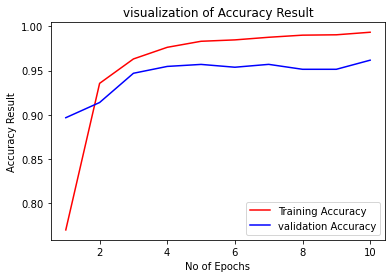

In [32]:
# Accuracy Visualization

epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label = 'validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of Accuracy Result")
plt.legend()
plt.show()

# some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred

550/550 [==============================] - 253s 458ms/step


array([[9.99999404e-01, 5.51068258e-09, 2.69633067e-14, ...,
        6.68895136e-18, 1.91075022e-20, 2.73541995e-17],
       [9.99996781e-01, 2.71056848e-08, 3.15779625e-11, ...,
        3.71247579e-16, 2.83558530e-15, 4.82071034e-17],
       [2.74777994e-04, 1.04469427e-14, 6.58758992e-10, ...,
        1.07389738e-19, 7.36798206e-20, 4.70860639e-16],
       ...,
       [4.16305814e-16, 1.15564977e-19, 5.41591641e-12, ...,
        5.80586227e-17, 1.08262296e-13, 1.00000000e+00],
       [3.53664928e-15, 9.10945817e-21, 5.85062015e-16, ...,
        4.54679378e-17, 1.27014896e-18, 1.00000000e+00],
       [4.19946482e-27, 3.62517962e-28, 3.42814929e-24, ...,
        5.71994116e-28, 2.73992142e-18, 1.00000000e+00]], dtype=float32)

In [36]:
y_pred.shape

(17572, 38)

In [37]:
predicted_categories = tf.argmax(y_pred,axis = 1)

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0, 19, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x, y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories, axis= 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.87      0.93       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.93      0.95       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[440,  11,   1, ...,   0,   1,   0],
       [  0, 492,   0, ...,   0,   0,   0],
       [  1,   0, 411, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 463,   1,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [  0,   0,   1, ...,   0,   0, 479]], dtype=int64)

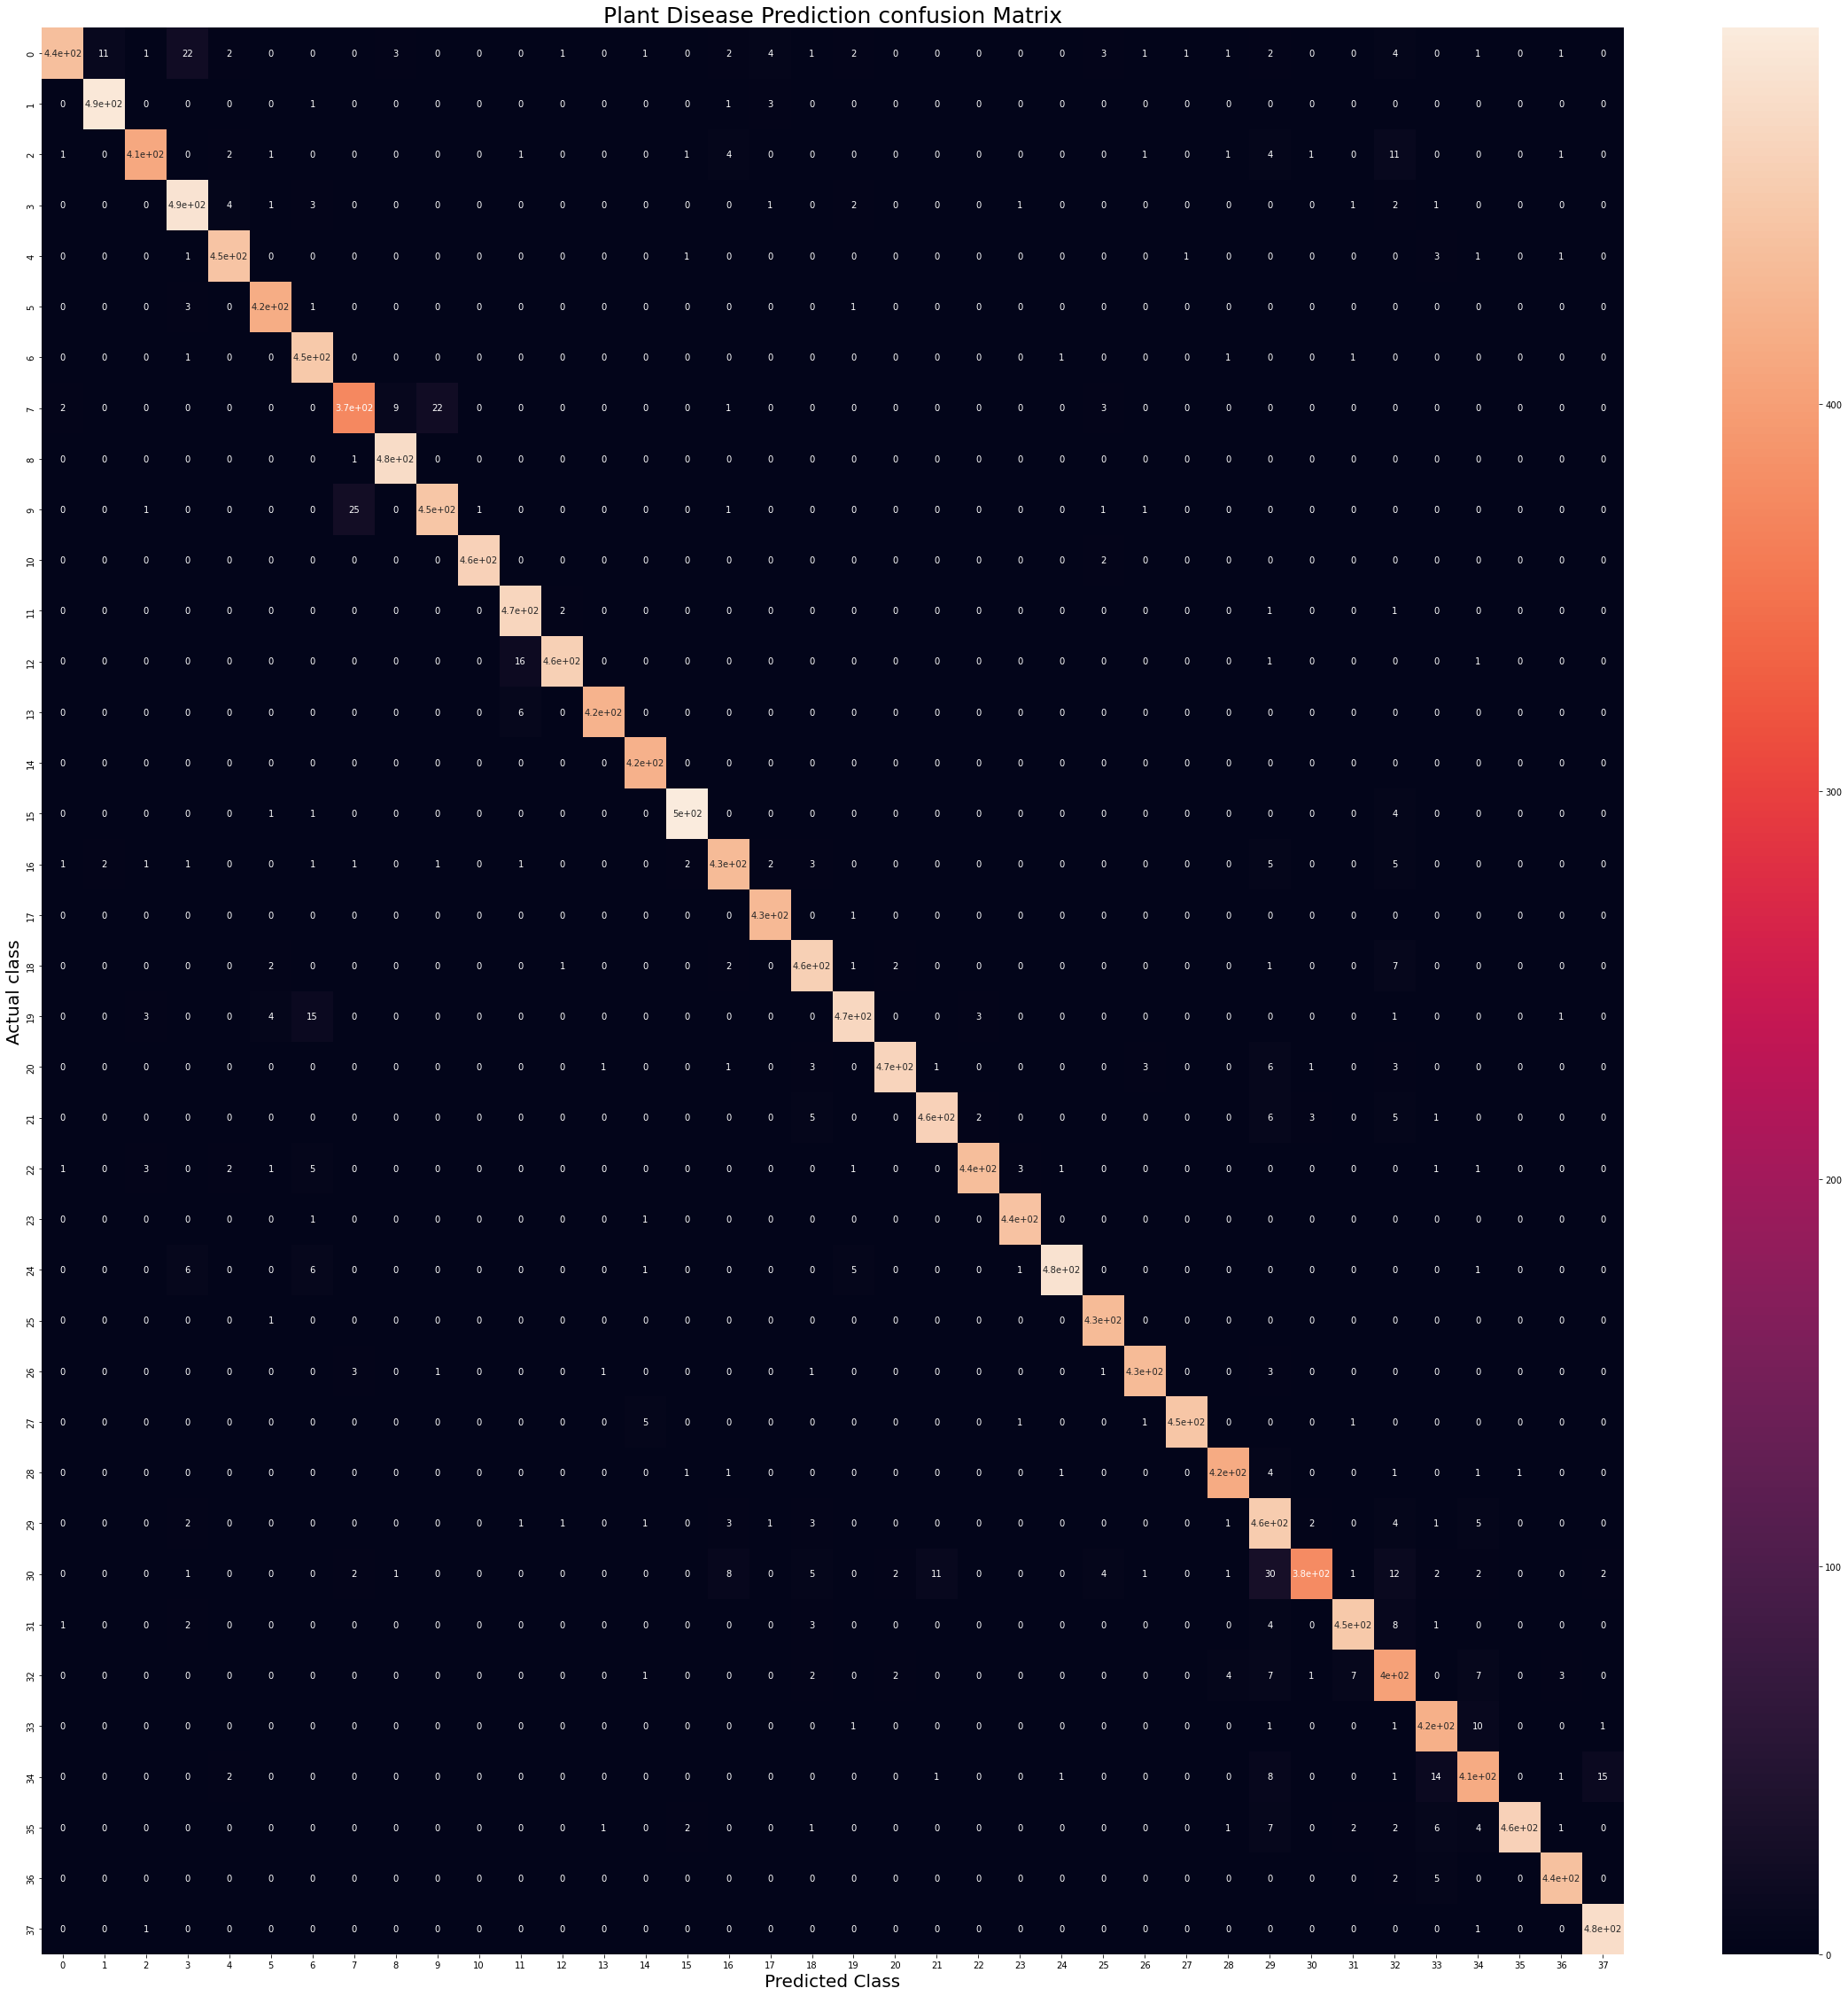

In [48]:
plt.figure(figsize = (40,40))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted Class" , fontsize = 20)
plt.ylabel("Actual class", fontsize = 20)
plt.title("Plant Disease Prediction confusion Matrix", fontsize = 25)
plt.show()